In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

weatherdf= "clean_wine_data.csv"
weatherdf2 = pd.read_csv(weatherdf)

weatherdf2

,Unnamed: 0,Unnamed: 0.1,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120970,129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
120971,129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
120972,129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
120973,129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [2]:
#sort by variety 
x7= weatherdf2.groupby(['variety'])

#get number of reviews for each variety to determine popularity
x8= x7.count()

#sort by descending order, so most popular to least
x9=x8.sort_values(by='Unnamed: 0', ascending=False)



In [3]:
#take max and min of each variety in separate dataframes and then merge

x= weatherdf2.groupby(['variety'])
variety_min_price=x['price'].min()
variety_min_price

variety_max_price = x['price'].max()
variety_max_price

maxmin=pd.merge(variety_min_price,variety_max_price, how='inner', on='variety')
maxmin


,price_x,price_y
variety,,
Abouriou,15.0,75.0
Agiorgitiko,10.0,66.0
Aglianico,6.0,180.0
Aidani,27.0,27.0
Airen,8.0,10.0
...,...,...
Zinfandel,5.0,100.0
Zlahtina,13.0,16.0
Zweigelt,9.0,70.0


In [4]:
#merge popularity and maxmin dataframe 

maxminvariety=pd.merge(x9,maxmin, how='inner', on='variety')
#drop unneeded columns and rename
maxminvarietydrop=maxminvariety.drop(["Unnamed: 0.1", "country", "description", 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'winery'], axis=1)
maxminvarietydropname=maxminvarietydrop.rename(columns = {'price_x':'Min Price', 'price_y':'Max Price', 'Unnamed: 0':'Number of Reviews'})
maxminvarietydropname.head(20)

,Number of Reviews,Min Price,Max Price
variety,,,
Pinot Noir,12787,5.0,2500.0
Chardonnay,11080,4.0,2013.0
Cabernet Sauvignon,9386,4.0,625.0
Red Blend,8476,5.0,500.0
Bordeaux-style Red Blend,5340,7.0,3300.0
Riesling,4972,5.0,775.0
Sauvignon Blanc,4783,5.0,135.0
Syrah,4086,4.0,750.0
Rosé,3262,5.0,800.0


<IPython.core.display.Javascript object>


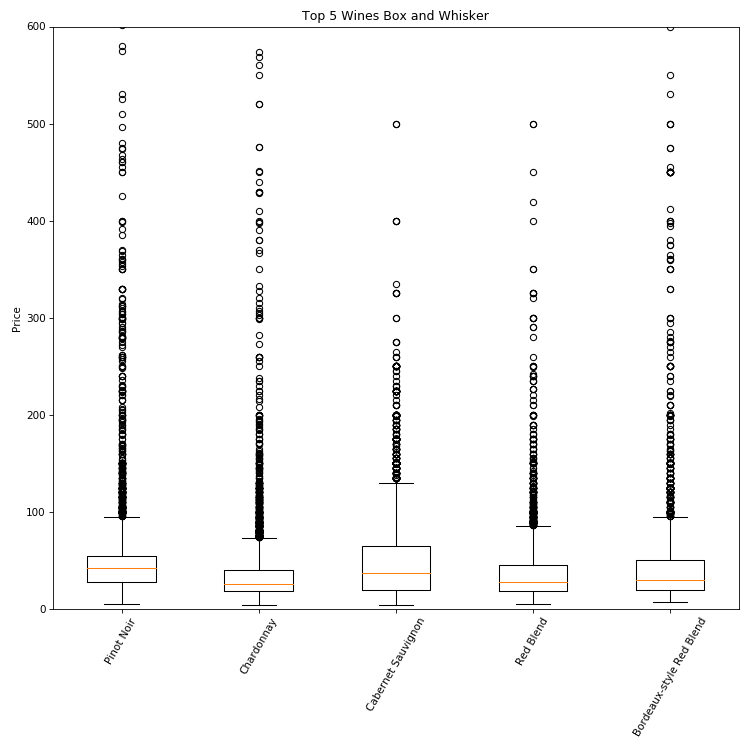

In [53]:
pinotnoir= weatherdf2.loc[weatherdf2['variety'] == 'Pinot Noir']
pinotvalues=pinotnoir['price']
chardonnay= weatherdf2.loc[weatherdf2['variety'] == 'Chardonnay']
chardvalues=chardonnay['price']
sauv= weatherdf2.loc[weatherdf2['variety'] == 'Cabernet Sauvignon']
sauvalues=sauv['price']
redblend= weatherdf2.loc[weatherdf2['variety'] == 'Red Blend']
redblendvalues= redblend['price']
bourdredblend= weatherdf2.loc[weatherdf2['variety'] == 'Bordeaux-style Red Blend']
bourdredblendvalues= bourdredblend['price']

fig1, ax1 = plt.subplots(figsize=(10,10))

ax1.set_title('Top 5 Wines Box and Whisker')
ax1.set_ylabel('Price')
ax1.boxplot([pinotvalues, chardvalues,sauvalues, redblendvalues,bourdredblendvalues])
ax1.set_xticklabels(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend'], rotation=60)
plt.ylim(0,600)
plt.tight_layout()
plt.savefig('top5wines')
plt.show()



In [6]:
#sort by country 
x20= weatherdf2.groupby(['country'])

#get number of reviews for each country to determine popularity
x21= x20.count()

#sort by descending order, so most popular to least
x22=x21.sort_values(by='Unnamed: 0', ascending=False)
x22


,Unnamed: 0,Unnamed: 0.1,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
country,,,,,,,,,,,,,,
US,54265,54265,54265,36751,54265,54265,54265,53989,50292,37511,34535,54265,54265,54265
France,17776,17776,17776,11840,17776,17776,17776,17708,0,17525,17525,17776,17776,17776
Italy,16914,16914,16914,11993,16914,16914,16914,16889,0,10121,10121,16914,16914,16914
Spain,6573,6573,6573,5257,6573,6573,6573,6565,0,6509,6509,6573,6573,6573
Portugal,4875,4875,4875,4381,4875,4875,4875,0,0,4870,4870,4875,4875,4875
Chile,4416,4416,4416,3825,4416,4416,4416,0,0,4305,4305,4416,4415,4416
Argentina,3756,3756,3756,2863,3756,3756,3756,3703,0,3753,3753,3756,3756,3756
Austria,2799,2799,2799,2370,2799,2799,2799,0,0,2791,2791,2799,2799,2799
Australia,2294,2294,2294,1618,2294,2294,2294,2292,0,2007,2007,2294,2294,2294


In [7]:
#take max and min price of each country in separate dataframes and then merge

x23= weatherdf2.groupby(['country'])
country_min_price=x23['price'].min()
country_min_price

country_max_price = x23['price'].max()
country_max_price

maxmincountry=pd.merge(country_min_price,country_max_price, how='inner', on='country')
maxmincountry


,price_x,price_y
country,,
Argentina,4.0,230.0
Armenia,14.0,15.0
Australia,5.0,850.0
Austria,7.0,1100.0
Bosnia and Herzegovina,12.0,13.0
Brazil,10.0,60.0
Bulgaria,8.0,100.0
Canada,12.0,120.0
Chile,5.0,400.0


In [8]:
#merge popularity by country and maxmin dataframe 

maxmincountry2=pd.merge(x22,maxmincountry, how='inner', on='country')
#drop unneeded columns and rename
maxmincountry2drop=maxmincountry2.drop(["Unnamed: 0.1", "description", 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'winery','variety'], axis=1)
maxmincountry2dropname=maxmincountry2drop.rename(columns = {'price_x':'Min Price', 'price_y':'Max Price', 'Unnamed: 0':'Number of Reviews'})
maxmincountry2dropname.head(20)

,Number of Reviews,Min Price,Max Price
country,,,
US,54265,4.0,2013.0
France,17776,5.0,3300.0
Italy,16914,5.0,900.0
Spain,6573,4.0,770.0
Portugal,4875,5.0,1000.0
Chile,4416,5.0,400.0
Argentina,3756,4.0,230.0
Austria,2799,7.0,1100.0
Australia,2294,5.0,850.0


<IPython.core.display.Javascript object>


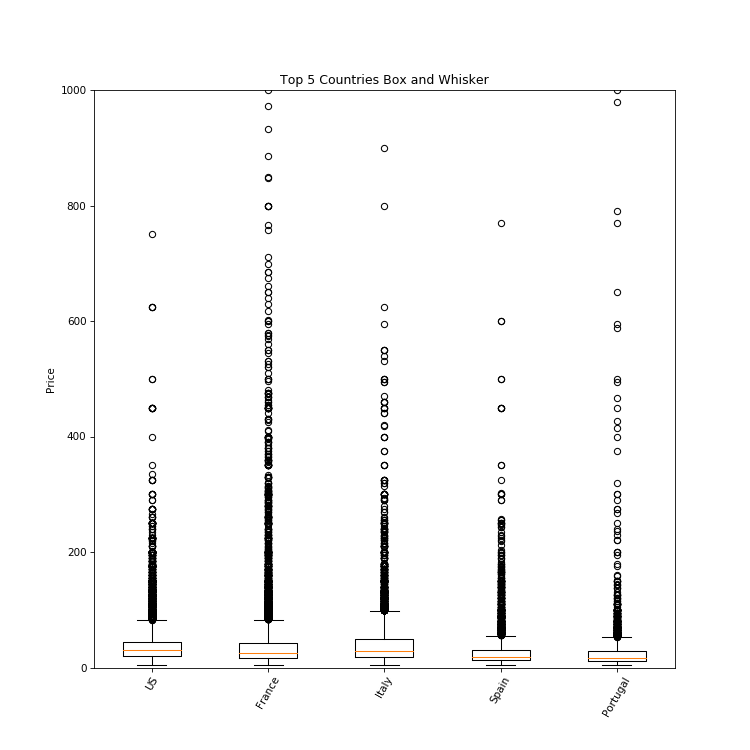

In [61]:
US= weatherdf2.loc[weatherdf2['country'] == 'US']
USvalues=US['price']
France= weatherdf2.loc[weatherdf2['country'] == 'France']
francevalues=France['price']
Italy= weatherdf2.loc[weatherdf2['country'] == 'Italy']
italyvalues=Italy['price']
Spain= weatherdf2.loc[weatherdf2['country'] == 'Spain']
spainvalues= Spain['price']
Portagul= weatherdf2.loc[weatherdf2['country'] == 'Portugal']
portagulvalues= Portagul['price']

#fig1, ax1 = plt.subplots()
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('Top 5 Countries Box and Whisker')
ax1.set_ylabel('Price')
ax1.boxplot([USvalues, francevalues, italyvalues, spainvalues,portagulvalues])
ax1.set_xticklabels(['US', 'France', 'Italy', 'Spain', 'Portugal'], rotation=60)
plt.ylim(0,1000)
plt.savefig('top5countries')
plt.show()


In [9]:
countrydf = weatherdf2.groupby(['country','variety'])

#get number of reviews for each variety to determine popularity
countrydf2 = countrydf.count()

#sort by descending order, so most popular to least
countrydf3= countrydf2.sort_values(by='Unnamed: 0', ascending=False)
countrydf3.head(20)
countrydf4=countrydf3.drop(["Unnamed: 0.1", "description", 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'winery'], axis=1)
countrydf4
#countryvarietymaxmin=pd.merge(countrydf4,maxmin, how='inner', on='variety')
#countryvarietymaxmin.head(20)


Unnamed: 0
country variety                       
US      Pinot Noir                9857
        Cabernet Sauvignon        7280
        Chardonnay                6773
Italy   Red Blend                 3263
US      Syrah                     3232
...                                ...
Mexico  Cinsault                     1
        Grenache                     1
        Merlot                       1
        Rosado                       1
Uruguay White Blend                  1

[1587 rows x 1 columns]